In [1]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('tweets.csv')

# Define a function to clean the text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'#\w+', '', text)
    #Remove @
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove extra whitespaces
    text = text.strip()
    # Remove 'rt :' (with or without spaces around the colon)
    text = re.sub(r'\brt\s*:\s*', '', text, flags=re.IGNORECASE)
    # Remove \r\n (line breaks)
    text = re.sub(r'\r\n', ' ', text)
    # Remove Unicode placeholders like <u+...>
    text = re.sub(r'<u\+\w+>', '', text)
    # Remove all exclamation marks
    text = text.replace('!', '')
    # Remove all question marks
    text = text.replace('?', '')
    # Remove specific unwanted characters
    text = re.sub(r'<u\+>', '', text)  # Remove <u+>
    text = re.sub(r'[©\':.,|]', '', text)  # Remove :, ', ., ,, |, and ©
    # Remove extra whitespaces caused by the cleanup
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the cleaning function to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

# Remove rows with missing values (if any)
df = df.dropna(subset=['clean_text'])

# Save the cleaned data to a new CSV file
df.to_csv('tweets_cleaned.csv', index=False)

print("Data cleaned and saved to 'tweets_cleaned.csv'.")


Data cleaned and saved to 'tweets_cleaned.csv'.


In [2]:
print(df.columns)


Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude', 'clean_text'],
      dtype='object')


In [3]:
import pandas as pd

# Specify the file path
file_path = 'tweets_cleaned.csv'

# Load the dataset
data = pd.read_csv(file_path)

# View the first few rows
data.head()


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,clean_text
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN,literally nobody me
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN,i’m emotional sorry x
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN,saving these bingo cards for tomorrow
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN,man these ads are everywhere
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN,we salute you


In [4]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['clean_text']].head(60)

,clean_text
0,literally nobody me
1,i’m emotional sorry x
2,saving these bingo cards for tomorrow
3,man these ads are everywhere
4,we salute you
5,the first non-spoiler critic reactions are here and nearly all are exceptionally positive with many prais…
6,ready to rock
7,we’re with him ‘til the end of the line
8,first reactions most emotional most epic mcu film
9,man these ads are everywhere


In [5]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['clean_text']].tail(60)

,clean_text
14940,man these ads are everywhere
14941,honestly chris evans saying he cried six times and hemsworth saying he cried more than six times means that we’re all literal…
14942,let’s bring our a game on &amp; get this one right releases this friday book your tickets on
14943,we’re with him ‘til the end of the line
14944,man these ads are everywhere
14945,comic con they were first seen as the avengers the last time they will be together
14946,we salute you
14947,we salute you
14948,as we get closer to the we will do to make you watch the great grand finale rt an…
14949,both scarlett and brie are with the infinity stones as rings but until now just them this means something …


In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

# Define the process_text function
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Return the processed tokens as a string
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Apply the process_text function to the 'clean_text' column
df['processed_text'] = df['clean_text'].apply(process_text)

# Check the first few rows of the new column
print(df['processed_text'].head())


0                      literally nobody me
1                  i ’ m emotional sorry x
2    saving these bingo cards for tomorrow
3             man these ads are everywhere
4                            we salute you
Name: processed_text, dtype: object


In [10]:
import pandas as pd
from nltk.tokenize import word_tokenize
df = pd.read_csv('tweets_cleaned.csv')

# Example of tokenizing a single text sample
sample_text = df['clean_text'][0]
tokens = word_tokenize(sample_text)
print(tokens)


['literally', 'nobody', 'me']


In [11]:
from nltk.corpus import stopwords

# Load stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)


['literally', 'nobody']


In [19]:
from nltk.tokenize import word_tokenize

# Define process_text if not already defined
def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    return ' '.join(tokens)

# Apply the function to the 'clean_text' column
if 'clean_text' in df.columns:
    df['processed_text'] = df['clean_text'].apply(process_text)
else:
    print("The column 'clean_text' does not exist in the DataFrame.")


In [20]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize words from the 'processed_text' column
if 'processed_text' in df.columns:
    all_tokens = [word for text in df['processed_text'] for word in word_tokenize(text)]
    fdist = FreqDist(all_tokens)
    print(fdist.most_common(20))  # Print the 20 most common words
else:
    print("The column 'processed_text' does not exist in the DataFrame.")


[('the', 7075), ('a', 3875), ('to', 3106), ('’', 2758), ('and', 2735), ('i', 2320), ('are', 2311), ('for', 2288), ('of', 2250), ('man', 2150), ('is', 2137), ('we', 2004), ('you', 1920), ('these', 1761), ('premiere', 1609), ('with', 1556), ('…', 1469), ('ads', 1457), ('everywhere', 1456), ('in', 1381)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of distinct words: 3433


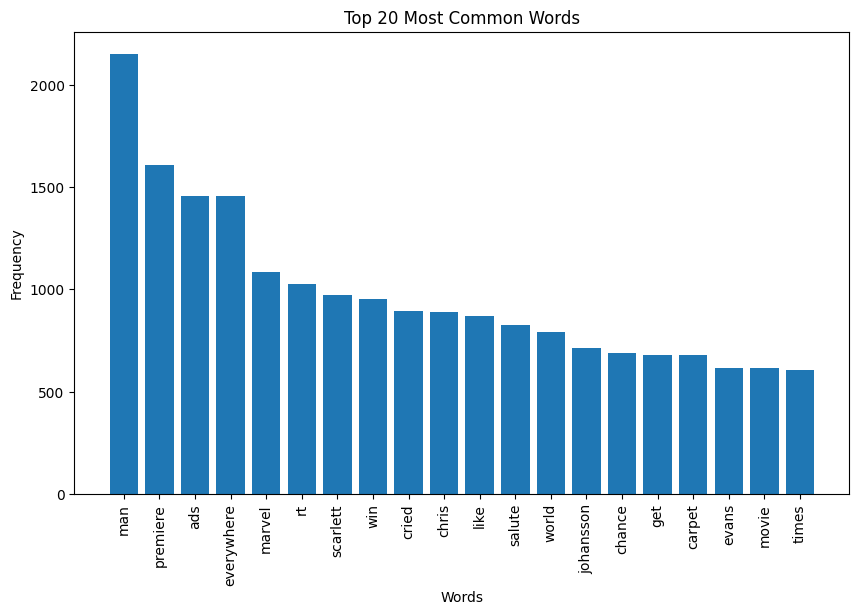

In [21]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Sample data (replace with your actual DataFrame)
df = pd.read_csv('tweets_cleaned.csv')

# Apply tokenization and remove stopwords
stop_words = set(stopwords.words('english'))

# Assuming 'clean_text' column holds the text data
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize and convert to lowercase

# Remove stopwords from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Combine all filtered tokens into one list for frequency distribution
all_tokens = [word for tokens in df['filtered_tokens'] for word in tokens]

# Create frequency distribution
fdist = FreqDist(all_tokens)

# Debugging: Print the number of distinct words
print(f"Number of distinct words: {len(fdist)}")

# Get the 20 most common words
top_20 = fdist.most_common(20)

# Separate the words and their frequencies
words, frequencies = zip(*top_20)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')

# Show the plot
plt.show()


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each processed text
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Check the first few rows of sentiment
print(df[['clean_text', 'sentiment']].head())


                              clean_text  sentiment
0                    literally nobody me     0.0000
1                  i’m emotional sorry x     0.0772
2  saving these bingo cards for tomorrow     0.0000
3           man these ads are everywhere     0.0000
4                          we salute you     0.0000


In [39]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('vader_lexicon')

# Load your dataset (replace with the actual file path)
df = pd.read_csv('tweets_cleaned.csv')  # Replace with your actual CSV file

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each processed text
# Assuming 'clean_text' is the column with cleaned text data
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Function to classify sentiment based on the compound score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add a new column for sentiment classification
df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

# Display the first few rows of the DataFrame with sentiment results
print(df[['clean_text', 'sentiment', 'sentiment_label']])

# Optional: Save the DataFrame to a new CSV file for further analysis
df.to_csv('tweets_with_sentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                                                                      clean_text  \
0                                                                                            literally nobody me   
1                                                                                          i’m emotional sorry x   
2                                                                          saving these bingo cards for tomorrow   
3                                                                                   man these ads are everywhere   
4                                                                                                  we salute you   
...                                                                                                          ...   
14995                                                first time last time with the avengers with the avengers #…   
14996  the cast has seen a lot of each other over the years so we figure

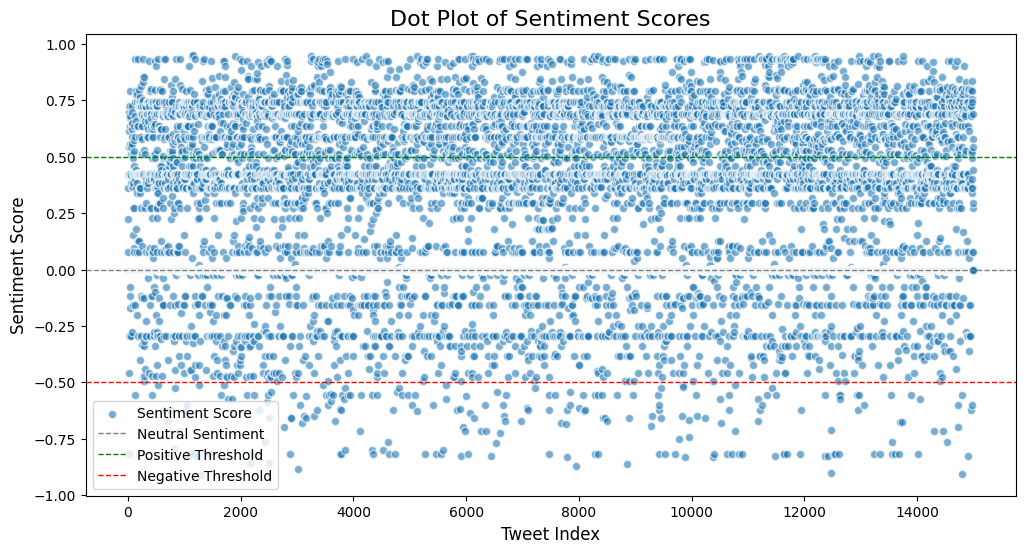

In [40]:
import matplotlib.pyplot as plt

# Create a dot plot
plt.figure(figsize=(12, 6))

# Plot the sentiment scores as a dot plot
plt.scatter(df.index, df['sentiment'], alpha=0.6, edgecolors='w', label='Sentiment Score')

# Add horizontal lines for reference
plt.axhline(y=0.0, color='gray', linestyle='--', linewidth=1, label='Neutral Sentiment')
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=1, label='Positive Threshold')
plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=1, label='Negative Threshold')

# Add labels and title
plt.title('Dot Plot of Sentiment Scores', fontsize=16)
plt.xlabel('Tweet Index', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [26]:
from textblob import TextBlob

# Apply TextBlob sentiment analysis
df['sentiment_tb'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check sentiment
print(df[['clean_text', 'sentiment_tb']].head())


                              clean_text  sentiment_tb
0                    literally nobody me          0.00
1                  i’m emotional sorry x         -0.25
2  saving these bingo cards for tomorrow          0.00
3           man these ads are everywhere          0.00
4                          we salute you          0.00


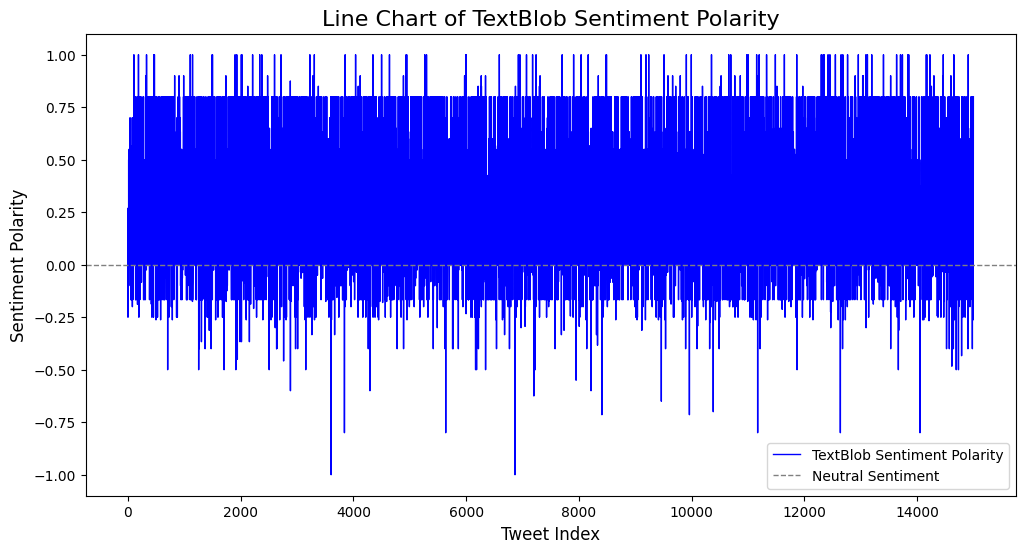

In [44]:
import matplotlib.pyplot as plt

# Plot the sentiment scores (TextBlob polarity) as a line chart
plt.figure(figsize=(12, 6))

# Line chart of sentiment polarity
plt.plot(df.index, df['sentiment_tb'], label='TextBlob Sentiment Polarity', color='blue', linewidth=1)

# Add a horizontal line for neutral sentiment (0.0)
plt.axhline(y=0.0, color='gray', linestyle='--', linewidth=1, label='Neutral Sentiment')

# Add labels and title
plt.title('Line Chart of TextBlob Sentiment Polarity', fontsize=16)
plt.xlabel('Tweet Index', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [27]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('tweets_cleaned.csv')  # Update with your actual file path

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic words, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    # Return processed text
    return " ".join(tokens)

# Apply preprocessing to the 'clean_text' column
df['processed_text'] = df['clean_text'].apply(process_text)

# Save the processed data to a new CSV file
df.to_csv('tweets_processed.csv', index=False)

print("Preprocessing complete. Processed data saved as 'tweets_processed.csv'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing complete. Processed data saved as 'tweets_processed.csv'.


In [28]:
import pandas as pd

# Specify the file path
file_path = 'tweets_processed.csv'

# Load the dataset
data = pd.read_csv(file_path)

# View the first few rows
data.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,clean_text,processed_text
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\n#AvengersEndgame https://t.co/LR9kFwfD5c,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",DavidAc96,637,True,False,NaN,NaN,literally nobody me,literally nobody
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\n2014 x 2019\r\n#blackwidow\r\n#captainamerica https://t.co/xcwkCMw18w",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NRmalaa,302,True,False,NaN,NaN,i’m emotional sorry x,emotional sorry x
2,3,saving these bingo cards for tomorrow \r\n©\r\n #AvengersEndgame https://t.co/d6For0jwRb,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",jijitsuu,0,False,False,NaN,NaN,saving these bingo cards for tomorrow,saving bingo card tomorrow
3,4,RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",SahapunB,23781,True,False,NaN,NaN,man these ads are everywhere,man ad everywhere
4,5,"RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",stella22_97,13067,True,False,NaN,NaN,we salute you,salute


In [29]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['processed_text']].head(60)

,processed_text
0,literally nobody
1,emotional sorry x
2,saving bingo card tomorrow
3,man ad everywhere
4,salute
5,first critic reaction nearly exceptionally positive many
6,ready rock
7,til end line
8,first reaction emotional epic mcu film
9,man ad everywhere


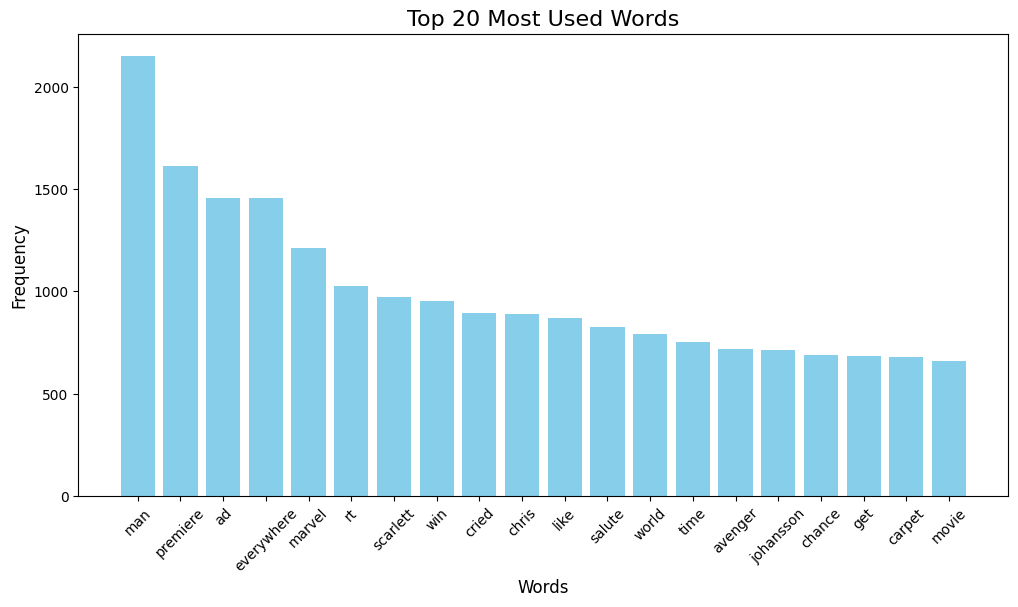

In [46]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the processed dataset
df = pd.read_csv('tweets_processed.csv')  # Ensure the correct file path is provided

# Replace NaN or non-string values with an empty string
df['processed_text'] = df['processed_text'].fillna("").astype(str)

# Combine all processed text into a single string
all_words = " ".join(df['processed_text'])

# Tokenize the combined text into individual words
word_list = all_words.split()

# Count the frequency of each word
word_counts = Counter(word_list)

# Get the top 20 most common words
most_common_words = word_counts.most_common(20)

# Separate the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Used Words', fontsize=16)

# Show the plot
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


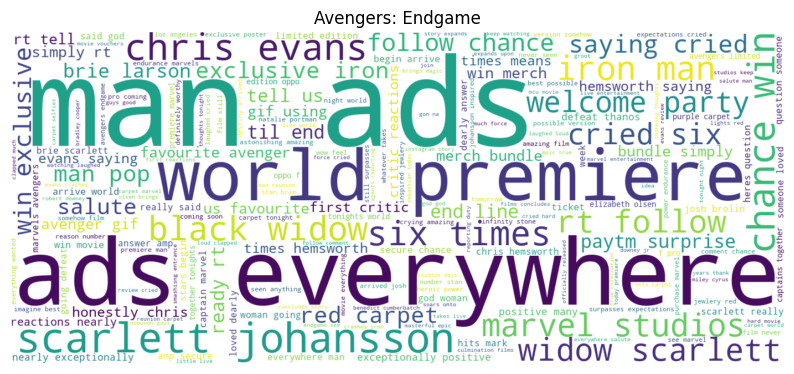

In [30]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset (replace with the correct path to your CSV)
df = pd.read_csv('tweets_cleaned.csv')

# Apply tokenization and remove stopwords
stop_words = set(stopwords.words('english'))

# Assuming 'clean_text' column holds the text data
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize and convert to lowercase

# Remove stopwords from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Combine all filtered tokens into a single text for Word Cloud
all_text = ' '.join([' '.join(tokens) for tokens in df['filtered_tokens']])

# Generate Word Cloud
wordcloud = WordCloud(width=1400, height=600, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Avengers: Endgame')
plt.show()


In [33]:
pip install torch transformers flair

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
model = BertModel.from_pretrained(bert_model_name)

# Example sentence
sentence = "This is a sample sentence for BERT."

# Tokenize and prepare inputs
inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)

# Extract the [CLS] token representation as the sentence embedding
cls_embedding = outputs.last_hidden_state[:, 0, :]
print("BERT [CLS] Embedding Shape:", cls_embedding.shape)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT [CLS] Embedding Shape: torch.Size([1, 768])


In [35]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence

# Load a pre-trained transformer-based embedding model
embedding_model = TransformerDocumentEmbeddings('bert-base-uncased')

# Example sentence
flair_sentence = Sentence("This is a sample sentence for Flair.")

# Embed the sentence
embedding_model.embed(flair_sentence)

# Access the sentence embedding
sentence_embedding = flair_sentence.get_embedding()
print("Flair Sentence Embedding Shape:", sentence_embedding.shape)


Flair Sentence Embedding Shape: torch.Size([768])


In [36]:
# Apply BERT for sentence embeddings
def bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

# Apply Flair for sentence embeddings
def flair_embedding(text):
    sentence = Sentence(text)
    embedding_model.embed(sentence)
    return sentence.get_embedding().numpy()

# Example DataFrame
import pandas as pd
data = {'clean_text': ["Text example 1.", "Another example text."]}
df = pd.DataFrame(data)

# Add BERT embeddings to the DataFrame
df['bert_embedding'] = df['clean_text'].apply(bert_embedding)

# Add Flair embeddings to the DataFrame
df['flair_embedding'] = df['clean_text'].apply(flair_embedding)

print(df.head())


              clean_text  \
0        Text example 1.   
1  Another example text.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   